In [6]:
from sympy import *
from matplotlib import pyplot as plt
from syscirc.plot import plotcont
from syscirc.components import *
from syscirc.symbolics import *

In [7]:
t = Symbol("t", real=True)

ω = Known("ω", real=True)
A = Known("A", real=True)
ϕ = Known("ϕ", real=True)
Vg = Known("V_g", A*exp(1j*(ω*t+ϕ)))
vg = Known("v_g", re(Vg))
I = Known("I")

R_ = 1; C_ = 1; L_ = 1
R = Resistor(R=Known("R", R_), name="R", I=I)
C = Capacitor(C=Known("C", C_), freq=ω, name="C", I=I)
L = Inductor(L=Known("L", L_), freq=ω, name="L", I=I)

In [32]:
loop1 = Eq(Vg, R.V + C.V + L.V)
loop1 = Known.resolve(loop1, exclude=Vg)
I.value = solve(loop1, I)[0]
loop1

Eq(V_g, I*Z_C + I*Z_L + I*Z_R)

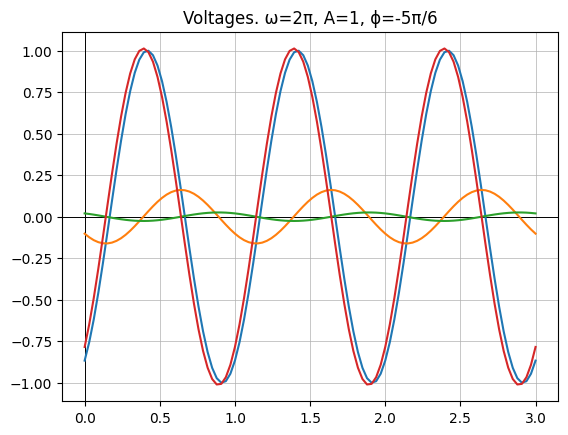

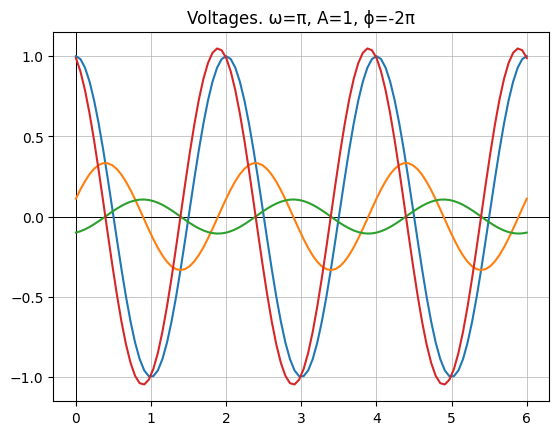

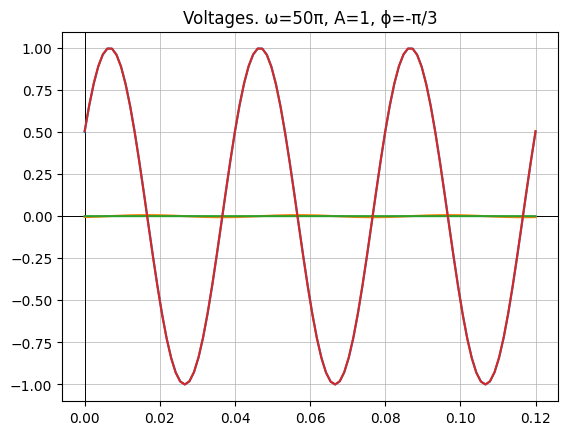

In [10]:
# Voltages over time. Blue: Vg, Orange: Vr, Green: Vc, Red: Vl

A.value = 1;   ω.value = 2*pi;   ϕ.value = -5/6*pi
plt.title("Voltages. ω=2π, A=1, ϕ=-5π/6")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

A.value = 1;   ω.value = pi;   ϕ.value = -2*pi
plt.title("Voltages. ω=π, A=1, ϕ=-2π")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

A.value = 1;   ω.value = 50*pi;   ϕ.value = -pi/3
plt.title("Voltages. ω=50π, A=1, ϕ=-π/3")
plotcont([vg, R.v, C.v, L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

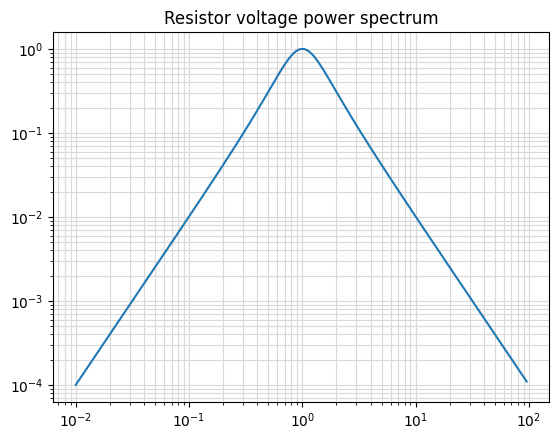

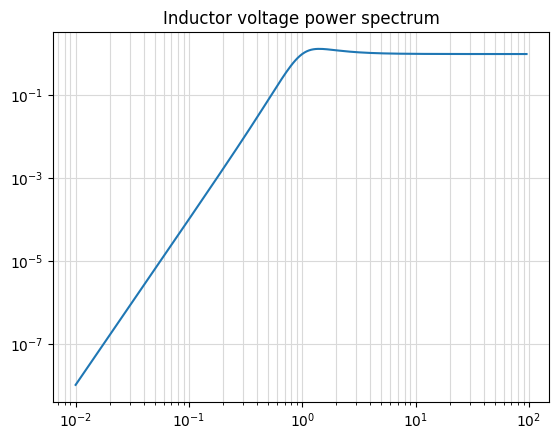

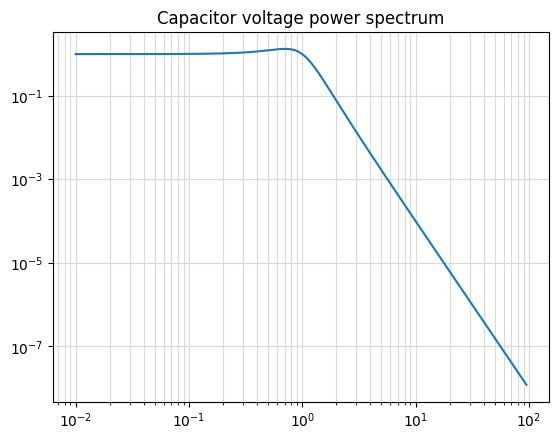

In [11]:
# Frequency responses
freqs = [10**(i/50) for i in range(-100, 100)]
ω.reset()

plt.loglog(freqs, evaluate_on_range(R.vp, freqs, var=ω))
plt.grid(True, which="both", ls="-", color='0.85')
plt.title("Resistor voltage power spectrum")
plt.show()

plt.loglog(freqs, evaluate_on_range(L.vp, freqs, var=ω))
plt.grid(True, which="both", ls="-", color='0.85')
plt.title("Inductor voltage power spectrum")
plt.show()

plt.loglog(freqs, evaluate_on_range(C.vp, freqs, var=ω))
plt.grid(True, which="both", ls="-", color='0.85')
plt.title("Capacitor voltage power spectrum")
plt.show()

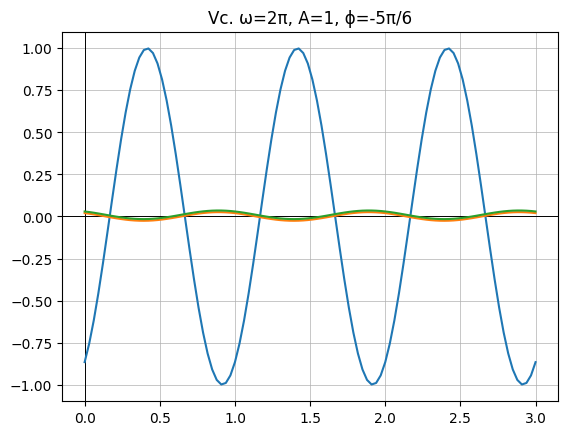

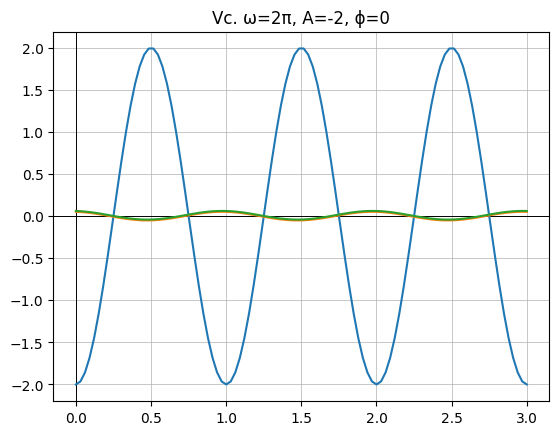

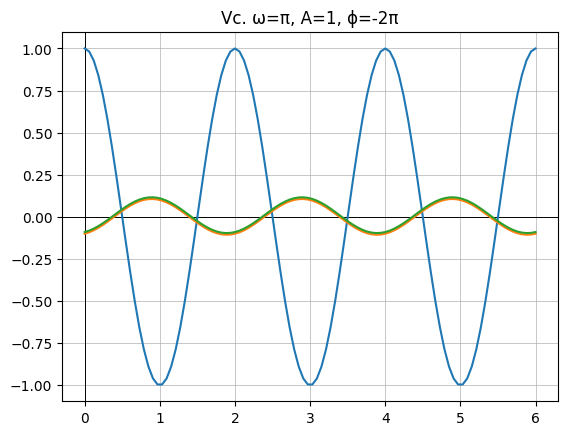

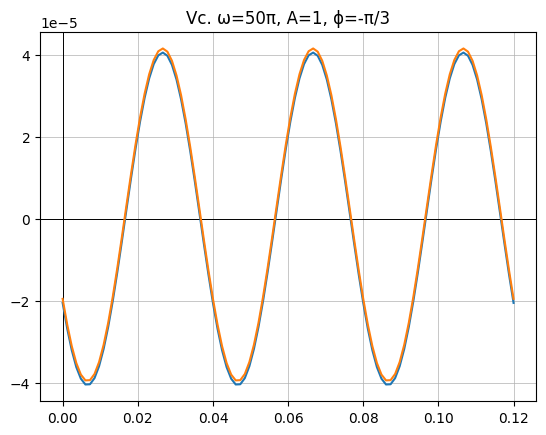

In [21]:
# Compare simulated and theoretical outputs. Blue: Vg, Orange: Vc, Green: calculated Vc

A.value = 1;   ω.value = 2*pi;   ϕ.value = -5/6*pi
vi1 = Known("V_i1", vg).freeze()
vc1 = Known("V_C1", C.v).freeze()
vc1_ = 0.0256*cos(2*pi*t+0.685)
plt.title("Vc. ω=2π, A=1, ϕ=-5π/6")
plotcont([vg, C.v, vc1_+0.01], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

A.value = -2;   ω.value = 2*pi;   ϕ.value = 0
vi2 = Known("V_i2", vg).freeze()
vc2 = Known("V_C2", C.v).freeze()
vc2_ = 0.0513*cos(2*pi*t+0.162)
plt.title("Vc. ω=2π, A=-2, ϕ=0")
plotcont([vg, C.v, vc2_+0.01], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

A.value = 1;   ω.value = pi;   ϕ.value = -2*pi
vi3 = Known("V_i3", vg).freeze()
vc3 = Known("V_C3", C.v).freeze()
vc3_ = 0.1063*cos(pi*t-2.801)
plt.title("Vc. ω=π, A=1, ϕ=-2π")
plotcont([vg, C.v, vc3_+0.01], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

A.value = 1;   ω.value = 50*pi;   ϕ.value = -pi/3
vi4 = Known("V_i4", vg).freeze()
vc4 = Known("V_C4", C.v).freeze()
vc4_ = 4.053e-5*cos(50*pi*t+2.101)
plt.title("Vc. ω=50π, A=1, ϕ=-π/3")
plotcont([C.v, vc4_+1e-6], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

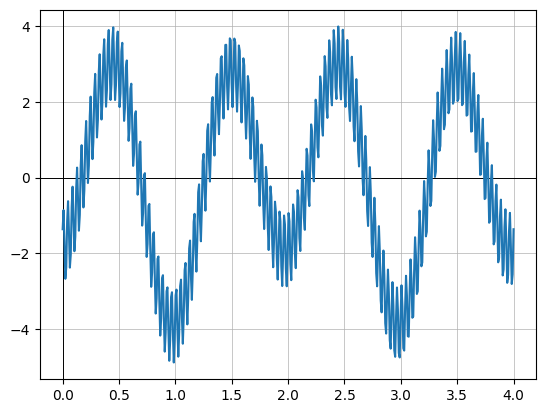

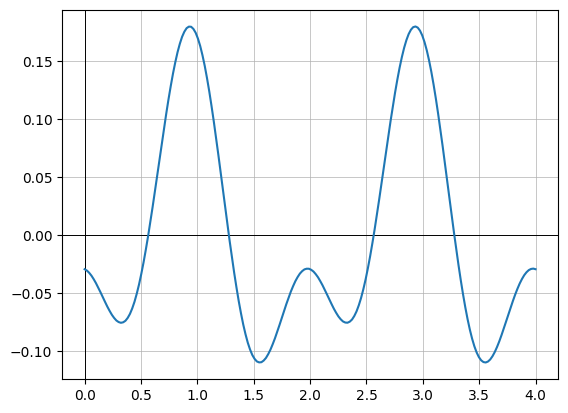

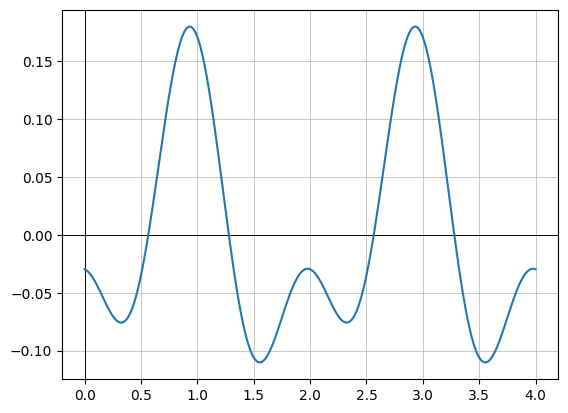

In [31]:
plotcont([vi1+vi2+vi3+vi4], [0, 4], nsamples=500, vars=t)
plotcont([vc1+vc2+vc3+vc4], [0, 4], nsamples=200, vars=t)
plotcont([vc1_+vc2_+vc3_+vc4_], [0, 4], nsamples=200, vars=t)